In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk5_cash_karp(f, y0, t0, tf, h):
    """Fifth-order Runge-Kutta using Cash-Karp method (fixed step)."""
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0

    while t < tf:
        if t + h > tf:
            h = tf - t

        # Cash–Karp coefficients
        c = [0, 1/5, 3/10, 3/5, 1, 7/8]
        a = [
            [],
            [1/5],
            [3/40, 9/40],
            [3/10, -9/10, 6/5],
            [-11/54, 5/2, -70/27, 35/27],
            [1631/55296, 175/512, 575/13824, 44275/110592, 253/4096]
        ]
        b = [37/378, 0, 250/621, 125/594, 0, 512/1771]  # 5th-order weights

        # Calculate stages
        k = [None] * 6
        k[0] = f(t, y)
        k[1] = f(t + c[1]*h, y + h*(a[1][0]*k[0]))
        k[2] = f(t + c[2]*h, y + h*(a[2][0]*k[0] + a[2][1]*k[1]))
        k[3] = f(t + c[3]*h, y + h*(a[3][0]*k[0] + a[3][1]*k[1] + a[3][2]*k[2]))
        k[4] = f(t + c[4]*h, y + h*(a[4][0]*k[0] + a[4][1]*k[1] + a[4][2]*k[2] + a[4][3]*k[3]))
        k[5] = f(t + c[5]*h, y + h*(a[5][0]*k[0] + a[5][1]*k[1] + a[5][2]*k[2] + a[5][3]*k[3] + a[5][4]*k[4]))

        y = y + h * sum(b[i] * k[i] for i in range(6))
        t += h

        t_values.append(t)
        y_values.append(y)

    return np.array(t_values), np.array(y_values)


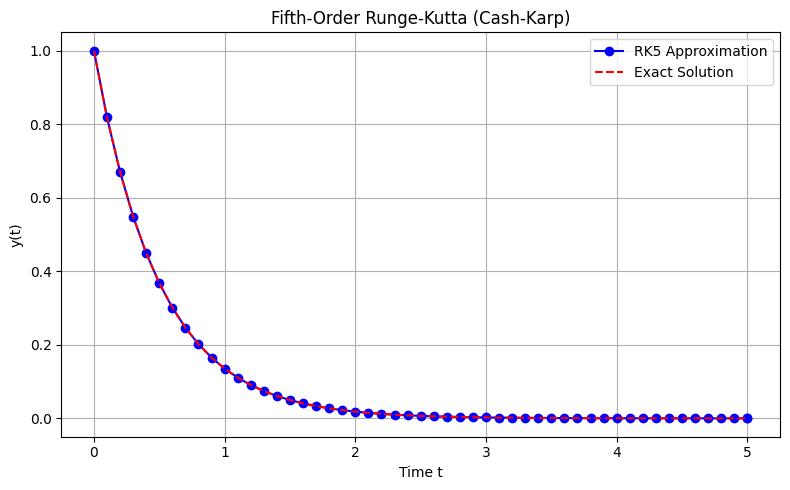

In [3]:
if __name__ == "__main__":
    # Define a sample ODE: y' = -2y, y(0) = 1
    f = lambda t, y: -2 * y
    y0 = 1.0
    t0 = 0.0
    tf = 5.0
    h = 0.1

    t_vals, y_vals = rk5_cash_karp(f, y0, t0, tf, h)

    # Exact solution: y = e^{-2t}
    y_exact = np.exp(-2 * t_vals)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(t_vals, y_vals, 'bo-', label='RK5 Approximation')
    plt.plot(t_vals, y_exact, 'r--', label='Exact Solution')
    plt.xlabel('Time t')
    plt.ylabel('y(t)')
    plt.title('Fifth-Order Runge-Kutta (Cash-Karp)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()